For H(z) Data

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from getdist import plots, MCSamples
from scipy import optimize
from IPython.display import display, Math

ab1 = [69.0, 1.003]
df = pd.read_csv('/home/suresh/Projects/Cosmology_Project/Hyperbolic/Data/57data.txt', delim_whitespace=True, header=None)
df.columns = ['H', 'sigmaH', 'z']
H = df.iloc[:, 0]
z = df.iloc[:, 2]
sigmaH = df.iloc[:, 1]

def log_likelihood(theta, z, H, sigmaH):
    a,b = theta
    model = b*((1/a)**(-1/b))*((1+z)**(1/b))     #model equation

    sigma2 = sigmaH ** 2
    likelihood = np.exp(-0.5 * np.sum((H - model) ** 2 / sigma2 + np.log(sigma2)))

    # Target an H0 value around 67
    h0_penalty = np.exp(-0.5 * ((a - 69) / 2) ** 2)  # Penalize deviations from 67

    return likelihood * h0_penalty

nll = lambda *args: -np.log(log_likelihood(*args))
soln = optimize.minimize(nll, ab1, args=(z, H, sigmaH))
ab1_ml = soln.x

def log_prior(theta):
    a, b = theta
    log_prior_a = -0.5 * ((a - 69) / 0.1) ** 2
    log_prior_b = -0.5 * ((b - 1.0) / 0.01) ** 2
    return log_prior_a + log_prior_b

def log_posterior(theta, z, H, sigmaH):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, z, H, sigmaH)

def metropolis_hastings(log_posterior, initial_state, iterations, proposal_scale, z, H, sigmaH):
    n_params = len(initial_state)
    chain = np.zeros((iterations, n_params))
    log_posterior_values = np.zeros(iterations)

    current_state = initial_state
    current_log_posterior = log_posterior(current_state, z, H, sigmaH)

    for i in range(iterations):
        proposed_state = current_state + np.random.normal(scale=proposal_scale, size=n_params)
        proposed_log_posterior = log_posterior(proposed_state, z, H, sigmaH)

        acceptance_ratio = np.exp(proposed_log_posterior - current_log_posterior)
        if acceptance_ratio >= 1 or acceptance_ratio > np.random.uniform():
            current_state = proposed_state
            current_log_posterior = proposed_log_posterior

        chain[i] = current_state
        log_posterior_values[i] = current_log_posterior

    return chain, log_posterior_values

n_iterations = 5000
proposal_scale = 0.05  # Smaller proposal scale for better exploration

chain, log_posterior_values = metropolis_hastings(log_posterior, ab1_ml, n_iterations, proposal_scale, z, H, sigmaH)

burn_in = 1000
thinning = 10
flat_samples = chain[burn_in::thinning]

#calculate H0

Ho = (flat_samples[:, 1]) * (1 / flat_samples[:, 0]) ** (-1 / (flat_samples[:, 1]))

flat_samples_with_Ho_Hz = np.column_stack((Ho, flat_samples))

/tmp/ipykernel_14838/6462844.py:27: RuntimeWarning: divide by zero encountered in log
  nll = lambda *args: -np.log(log_likelihood(*args))
/home/suresh/.local/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/tmp/ipykernel_14838/6462844.py:27: RuntimeWarning: divide by zero encountered in log
  nll = lambda *args: -np.log(log_likelihood(*args))


Removed no burn in


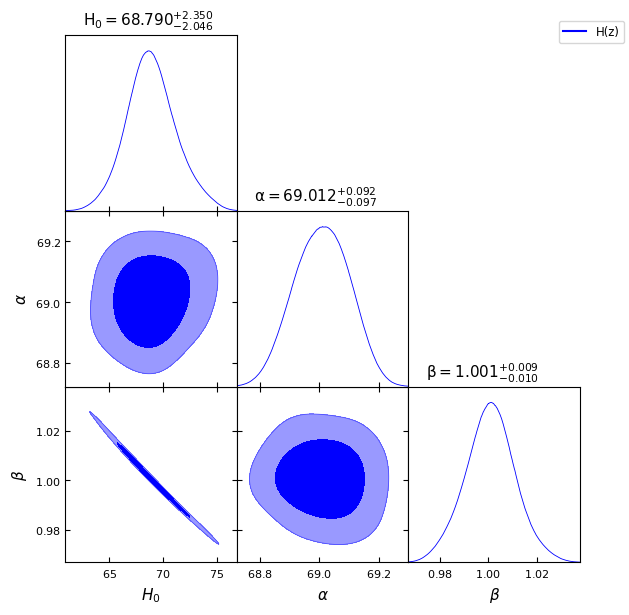

In [26]:
import getdist.plots as plots
from getdist import MCSamples
import matplotlib.pyplot as plt
from IPython.display import display, Math

colorh = 'blue'
names = ['Ho', 'a', 'b']
labels = ['H_0', '\\alpha', '\\beta']


# Create an instance of MCSamples
samples = MCSamples(samples=flat_samples_with_Ho_Hz, names=names, labels=labels)

# Create a plotter instance
g = plots.get_subplot_plotter()

# Plot the triangular plot
g.triangle_plot(samples, filled=True, colors = [colorh,colorh,colorh], line_args={'color': colorh})

# Add a blue line as legend with label "BAO"
# plt.plot([], [], label='H(z)')
plt.plot([], [], label='H(z)', color = colorh)
# Calculate the values of Ho and q
for i in range(3):
    mcmc = np.percentile(flat_samples_with_Ho_Hz[:, i], [16, 50, 84])
    q = np.diff(mcmc)
    txt = "$\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{+{2:.3f}}}$".format(mcmc[1], q[0], q[1], labels[i])
    
    # Add text annotation to the plot
    g.subplots[i, i].annotate(txt, xy=(0.1, 1.05), xycoords='axes fraction', fontsize=11, color='black')

# Add the legend
g.fig.legend(loc='upper right', fontsize='small', bbox_to_anchor=(1.05, 1))

plt.show()


For BAO Data

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from getdist import plots, MCSamples
from scipy import optimize
from IPython.display import display, Math

ab1 = [69.0, 0.997]
df = pd.read_csv('/home/suresh/Projects/Cosmology_Project/FRW_paper1/Data/BAO_data.txt', delim_whitespace=True, header=None)
df.columns = ['H', 'sigmaH', 'z']
H = df.iloc[:, 0]
z = df.iloc[:, 2]
sigmaH = df.iloc[:, 1]

def log_likelihood(theta, z, H, sigmaH):
    a,b = theta
    model = b*((1/a)**(-1/b))*((1+z)**(1/b))     #model equation

    sigma2 = sigmaH ** 2
    likelihood = np.exp(-0.5 * np.sum((H - model) ** 2 / sigma2 + np.log(sigma2)))

    # Target an H0 value around 67
    h0_penalty = np.exp(-0.5 * ((a - 69) / 2) ** 2)  # Penalize deviations from 67

    return likelihood * h0_penalty

nll = lambda *args: -np.log(log_likelihood(*args))
soln = optimize.minimize(nll, ab1, args=(z, H, sigmaH))
ab1_ml = soln.x

def log_prior(theta):
    a, b = theta
    log_prior_a = -0.5 * ((a - 69) / 0.1) ** 2
    log_prior_b = -0.5 * ((b - 0.997) / 0.01) ** 2
    return log_prior_a + log_prior_b

def log_posterior(theta, z, H, sigmaH):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, z, H, sigmaH)

def metropolis_hastings(log_posterior, initial_state, iterations, proposal_scale, z, H, sigmaH):
    n_params = len(initial_state)
    chain = np.zeros((iterations, n_params))
    log_posterior_values = np.zeros(iterations)

    current_state = initial_state
    current_log_posterior = log_posterior(current_state, z, H, sigmaH)

    for i in range(iterations):
        proposed_state = current_state + np.random.normal(scale=proposal_scale, size=n_params)
        proposed_log_posterior = log_posterior(proposed_state, z, H, sigmaH)

        acceptance_ratio = np.exp(proposed_log_posterior - current_log_posterior)
        if acceptance_ratio >= 1 or acceptance_ratio > np.random.uniform():
            current_state = proposed_state
            current_log_posterior = proposed_log_posterior

        chain[i] = current_state
        log_posterior_values[i] = current_log_posterior

    return chain, log_posterior_values

n_iterations = 5000
proposal_scale = 0.05  # Smaller proposal scale for better exploration

chain, log_posterior_values = metropolis_hastings(log_posterior, ab1_ml, n_iterations, proposal_scale, z, H, sigmaH)

burn_in = 1000
thinning = 10
flat_samples = chain[burn_in::thinning]

#calculate H0

Ho = (flat_samples[:, 1]) * (1 / flat_samples[:, 0]) ** (-1 / (flat_samples[:, 1]))

flat_samples_with_Ho_BAO = np.column_stack((Ho, flat_samples))

/tmp/ipykernel_14838/4226611566.py:27: RuntimeWarning: divide by zero encountered in log
  nll = lambda *args: -np.log(log_likelihood(*args))
/home/suresh/.local/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/tmp/ipykernel_14838/4226611566.py:27: RuntimeWarning: divide by zero encountered in log
  nll = lambda *args: -np.log(log_likelihood(*args))


Removed no burn in


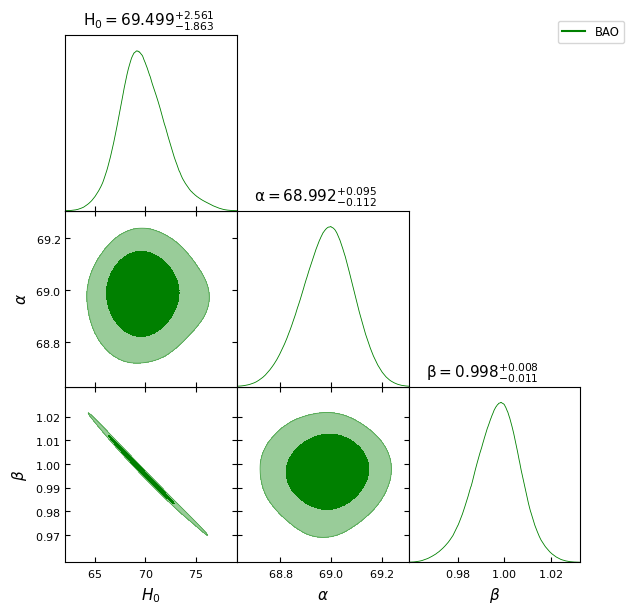

In [28]:
import getdist.plots as plots
from getdist import MCSamples
import matplotlib.pyplot as plt
from IPython.display import display, Math

colorb = 'green' #color of the plot
names = ['Ho', 'a', 'b']
labels = ['H_0', '\\alpha', '\\beta']


# Create an instance of MCSamples
samples = MCSamples(samples=flat_samples_with_Ho_BAO, names=names, labels=labels)

# Create a plotter instance
g = plots.get_subplot_plotter()

# Plot the triangular plot
g.triangle_plot(samples, filled=True, colors = [colorb, colorb, colorb], line_args={'color': colorb})

# Add a blue line as legend with label "BAO"
# plt.plot([], [], label='H(z)')
plt.plot([], [], label='BAO', color = colorb)
# Calculate the values of Ho and q
for i in range(3):
    mcmc = np.percentile(flat_samples_with_Ho_BAO[:, i], [16, 50, 84])
    q = np.diff(mcmc)
    txt = "$\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{+{2:.3f}}}$".format(mcmc[1], q[0], q[1], labels[i])
    
    # Add text annotation to the plot
    g.subplots[i, i].annotate(txt, xy=(0.1, 1.05), xycoords='axes fraction', fontsize=11, color='black')

# Add the legend
g.fig.legend(loc='upper right', fontsize='small', bbox_to_anchor=(1.05, 1))

plt.show()


For Pantheon Data

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from getdist import plots, MCSamples
from scipy import optimize
from IPython.display import display, Math

ab1 = [69.0, 1.00]
df = pd.read_csv('/home/suresh/Projects/Cosmology_Project/FRW_paper1/Data/transformed_pantheon_data.txt', delim_whitespace=True, header=None)
df.columns = ['H', 'sigmaH', 'z']
H = df.iloc[:, 0]
z = df.iloc[:, 2]
sigmaH = df.iloc[:, 1]

def log_likelihood(theta, z, H, sigmaH):
    a,b = theta
    model = b*((1/a)**(-1/b))*((1+z)**(1/b))     #model equation

    sigma2 = sigmaH ** 2
    likelihood = np.exp(-0.5 * np.sum((H - model) ** 2 / sigma2 + np.log(sigma2)))

    # Target an H0 value around 67
    h0_penalty = np.exp(-0.5 * ((a - 69) / 2) ** 2)  # Penalize deviations from 67

    return likelihood * h0_penalty

nll = lambda *args: -np.log(log_likelihood(*args))
soln = optimize.minimize(nll, ab1, args=(z, H, sigmaH))
ab1_ml = soln.x

def log_prior(theta):
    a, b = theta
    log_prior_a = -0.5 * ((a - 69) / 0.1) ** 2
    log_prior_b = -0.5 * ((b - 1.00) / 0.01) ** 2
    return log_prior_a + log_prior_b

def log_posterior(theta, z, H, sigmaH):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, z, H, sigmaH)

def metropolis_hastings(log_posterior, initial_state, iterations, proposal_scale, z, H, sigmaH):
    n_params = len(initial_state)
    chain = np.zeros((iterations, n_params))
    log_posterior_values = np.zeros(iterations)

    current_state = initial_state
    current_log_posterior = log_posterior(current_state, z, H, sigmaH)

    for i in range(iterations):
        proposed_state = current_state + np.random.normal(scale=proposal_scale, size=n_params)
        proposed_log_posterior = log_posterior(proposed_state, z, H, sigmaH)

        acceptance_ratio = np.exp(proposed_log_posterior - current_log_posterior)
        if acceptance_ratio >= 1 or acceptance_ratio > np.random.uniform():
            current_state = proposed_state
            current_log_posterior = proposed_log_posterior

        chain[i] = current_state
        log_posterior_values[i] = current_log_posterior

    return chain, log_posterior_values

n_iterations = 5000
proposal_scale = 0.05  # Smaller proposal scale for better exploration

chain, log_posterior_values = metropolis_hastings(log_posterior, ab1_ml, n_iterations, proposal_scale, z, H, sigmaH)

burn_in = 1000
thinning = 10
flat_samples = chain[burn_in::thinning]

#calculate H0

Ho = (flat_samples[:, 1]) * (1 / flat_samples[:, 0]) ** (-1 / (flat_samples[:, 1]))

flat_samples_with_Ho_Pan = np.column_stack((Ho, flat_samples))

/tmp/ipykernel_14838/1773781713.py:27: RuntimeWarning: divide by zero encountered in log
  nll = lambda *args: -np.log(log_likelihood(*args))
/home/suresh/.local/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


Removed no burn in


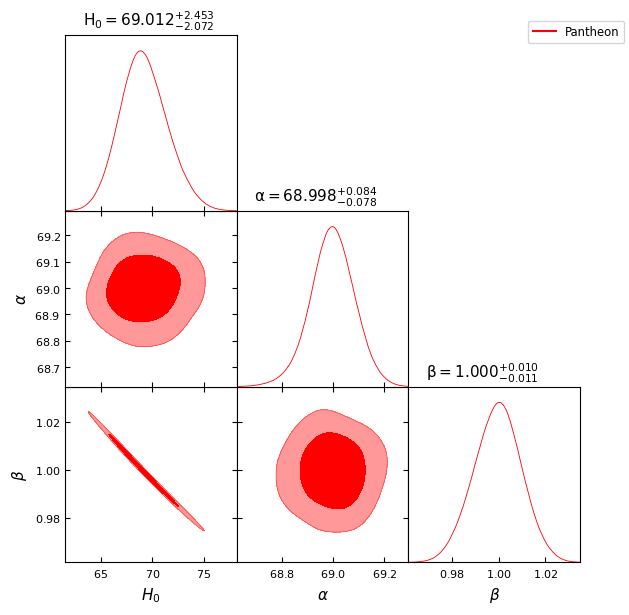

In [30]:
import getdist.plots as plots
from getdist import MCSamples
import matplotlib.pyplot as plt
from IPython.display import display, Math

colorp = 'red' #color of the plot
names = ['Ho', 'a', 'b']
labels = ['H_0', '\\alpha', '\\beta']


# Create an instance of MCSamples
samples = MCSamples(samples=flat_samples_with_Ho_Pan, names=names, labels=labels)

# Create a plotter instance
g = plots.get_subplot_plotter()

# Plot the triangular plot
g.triangle_plot(samples, filled=True, colors = [colorp, colorp, colorp], line_args={'color': colorp})

# Add a blue line as legend with label "BAO"
# plt.plot([], [], label='H(z)')
plt.plot([], [], label='Pantheon', color = colorp)
# Calculate the values of Ho and q
for i in range(3):
    mcmc = np.percentile(flat_samples_with_Ho_Pan[:, i], [16, 50, 84])
    q = np.diff(mcmc)
    txt = "$\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{+{2:.3f}}}$".format(mcmc[1], q[0], q[1], labels[i])
    
    # Add text annotation to the plot
    g.subplots[i, i].annotate(txt, xy=(0.1, 1.05), xycoords='axes fraction', fontsize=11, color='black')

# Add the legend
g.fig.legend(loc='upper right', fontsize='small', bbox_to_anchor=(1.05, 1))

plt.show()


For H(z) + Pantheon

In [31]:
# # H(z) and Pantheon

# flat_samples_Hz_Pan = np.row_stack((flat_samples_with_Ho_Hz, flat_samples_with_Ho_Pan))

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from getdist import plots, MCSamples
from scipy import optimize
from IPython.display import display, Math

ab1 = [69.0, 1.005]

dfh = pd.read_csv('/home/suresh/Projects/Cosmology_Project/Hyperbolic/Data/57data.txt', delim_whitespace=True, header=None)
dfh.columns = ['H', 'sigmaH', 'z']
Hh = dfh.iloc[:, 0]
zh = dfh.iloc[:, 2]
sigmaHh = dfh.iloc[:, 1]

dfp = pd.read_csv('/home/suresh/Projects/Cosmology_Project/FRW_paper1/Data/transformed_pantheon_data.txt', delim_whitespace=True, header=None)
dfp.columns = ['H', 'sigmaH', 'z']
Hp = dfp.iloc[:, 0]
zp = dfp.iloc[:, 2]
sigmaHp = dfp.iloc[:, 1]

z = pd.concat([zh,zp], axis=0, ignore_index=True)
H = pd.concat([Hh,Hp], axis=0, ignore_index=True)
sigmaH = pd.concat([sigmaHh, sigmaHp], axis=0, ignore_index=True)

def log_likelihood(theta, z, H, sigmaH):
    a,b = theta
    model = b*((1/a)**(-1/b))*((1+z)**(1/b))     #model equation

    sigma2 = sigmaH ** 2
    likelihood = np.exp(-0.5 * np.sum((H - model) ** 2 / sigma2 + np.log(sigma2)))

    # Target an H0 value around 67
    h0_penalty = np.exp(-0.5 * ((a - 69) / 2) ** 2)  # Penalize deviations from 67

    return likelihood * h0_penalty

nll = lambda *args: -np.log(log_likelihood(*args))
soln = optimize.minimize(nll, ab1, args=(z, H, sigmaH))
ab1_ml = soln.x

def log_prior(theta):
    a, b = theta
    log_prior_a = -0.5 * ((a - 69) / 0.1) ** 2
    log_prior_b = -0.5 * ((b - 1.005) / 0.01) ** 2
    return log_prior_a + log_prior_b

def log_posterior(theta, z, H, sigmaH):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, z, H, sigmaH)

def metropolis_hastings(log_posterior, initial_state, iterations, proposal_scale, z, H, sigmaH):
    n_params = len(initial_state)
    chain = np.zeros((iterations, n_params))
    log_posterior_values = np.zeros(iterations)

    current_state = initial_state
    current_log_posterior = log_posterior(current_state, z, H, sigmaH)

    for i in range(iterations):
        proposed_state = current_state + np.random.normal(scale=proposal_scale, size=n_params)
        proposed_log_posterior = log_posterior(proposed_state, z, H, sigmaH)

        acceptance_ratio = np.exp(proposed_log_posterior - current_log_posterior)
        if acceptance_ratio >= 1 or acceptance_ratio > np.random.uniform():
            current_state = proposed_state
            current_log_posterior = proposed_log_posterior

        chain[i] = current_state
        log_posterior_values[i] = current_log_posterior

    return chain, log_posterior_values

n_iterations = 5000
proposal_scale = 0.05  # Smaller proposal scale for better exploration

chain, log_posterior_values = metropolis_hastings(log_posterior, ab1_ml, n_iterations, proposal_scale, z, H, sigmaH)

burn_in = 1000
thinning = 10
flat_samples = chain[burn_in::thinning]

#calculate H0

Ho = (flat_samples[:, 1]) * (1 / flat_samples[:, 0]) ** (-1 / (flat_samples[:, 1]))

flat_samples_Hz_Pan = np.column_stack((Ho, flat_samples))

/tmp/ipykernel_14838/2574439016.py:38: RuntimeWarning: divide by zero encountered in log
  nll = lambda *args: -np.log(log_likelihood(*args))
/home/suresh/.local/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


Removed no burn in


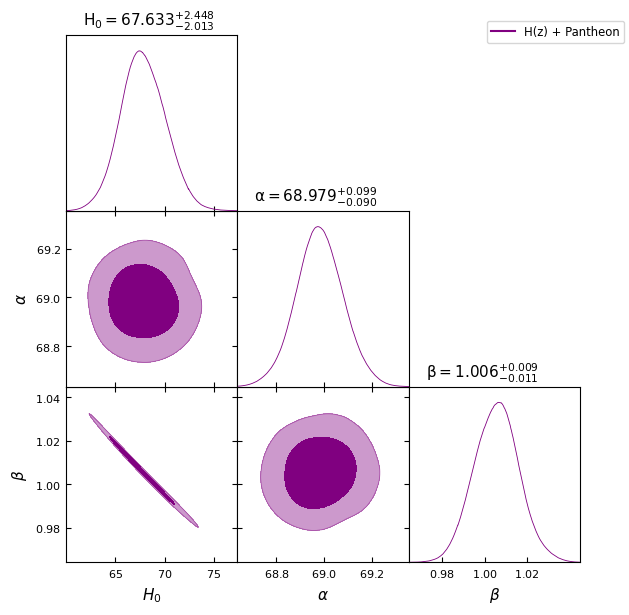

In [33]:
import getdist.plots as plots
from getdist import MCSamples
import matplotlib.pyplot as plt
from IPython.display import display, Math

colorhp = 'purple' #color of the plot
names = ['Ho', 'a', 'b']
labels = ['H_0', '\\alpha', '\\beta']


# Create an instance of MCSamples
samples = MCSamples(samples=flat_samples_Hz_Pan, names=names, labels=labels)

# Create a plotter instance
g = plots.get_subplot_plotter()

# Plot the triangular plot
g.triangle_plot(samples, filled=True, colors = [colorhp, colorhp, colorhp], line_args={'color': colorhp})

# Add a blue line as legend with label "BAO"
# plt.plot([], [], label='H(z)')
plt.plot([], [], label='H(z) + Pantheon', color = colorhp)
# Calculate the values of Ho and q
for i in range(3):
    mcmc = np.percentile(flat_samples_Hz_Pan[:, i], [16, 50, 84])
    q = np.diff(mcmc)
    txt = "$\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{+{2:.3f}}}$".format(mcmc[1], q[0], q[1], labels[i])
    
    # Add text annotation to the plot
    g.subplots[i, i].annotate(txt, xy=(0.1, 1.05), xycoords='axes fraction', fontsize=11, color='black')

# Add the legend
g.fig.legend(loc='upper right', fontsize='small', bbox_to_anchor=(1.05, 1))

plt.show()


For H(z) + BAO + Pantheon

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from getdist import plots, MCSamples
from scipy import optimize
from IPython.display import display, Math

ab1 = [69.0, 1.002]

dfh = pd.read_csv('/home/suresh/Projects/Cosmology_Project/Hyperbolic/Data/57data.txt', delim_whitespace=True, header=None)
dfh.columns = ['H', 'sigmaH', 'z']
Hh = dfh.iloc[:, 0]
zh = dfh.iloc[:, 2]
sigmaHh = dfh.iloc[:, 1]

dfb = pd.read_csv('/home/suresh/Projects/Cosmology_Project/FRW_paper1/Data/transformed_pantheon_data.txt', delim_whitespace=True, header=None)
dfb.columns = ['H', 'sigmaH', 'z']
Hb = dfb.iloc[:, 0]
zb = dfb.iloc[:, 2]
sigmaHb = dfb.iloc[:, 1]

dfp = pd.read_csv('/home/suresh/Projects/Cosmology_Project/FRW_paper1/Data/transformed_pantheon_data.txt', delim_whitespace=True, header=None)
dfp.columns = ['H', 'sigmaH', 'z']
Hp = dfp.iloc[:, 0]
zp = dfp.iloc[:, 2]
sigmaHp = dfp.iloc[:, 1]

z = pd.concat([zh,zb,zp], axis=0, ignore_index=True)
H = pd.concat([Hh,Hb,Hp], axis=0, ignore_index=True)
sigmaH = pd.concat([sigmaHh,sigmaHb,sigmaHp], axis=0, ignore_index=True)

def log_likelihood(theta, z, H, sigmaH):
    a,b = theta
    model = b*((1/a)**(-1/b))*((1+z)**(1/b))     #model equation

    sigma2 = sigmaH ** 2
    likelihood = np.exp(-0.5 * np.sum((H - model) ** 2 / sigma2 + np.log(sigma2)))

    # Target an H0 value around 67
    h0_penalty = np.exp(-0.5 * ((a - 69) / 2) ** 2)  # Penalize deviations from 67

    return likelihood * h0_penalty

nll = lambda *args: -np.log(log_likelihood(*args))
soln = optimize.minimize(nll, ab1, args=(z, H, sigmaH))
ab1_ml = soln.x

def log_prior(theta):
    a, b = theta
    log_prior_a = -0.5 * ((a - 69) / 0.1) ** 2
    log_prior_b = -0.5 * ((b - 1.0029) / 0.01) ** 2
    return log_prior_a + log_prior_b

def log_posterior(theta, z, H, sigmaH):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, z, H, sigmaH)

def metropolis_hastings(log_posterior, initial_state, iterations, proposal_scale, z, H, sigmaH):
    n_params = len(initial_state)
    chain = np.zeros((iterations, n_params))
    log_posterior_values = np.zeros(iterations)

    current_state = initial_state
    current_log_posterior = log_posterior(current_state, z, H, sigmaH)

    for i in range(iterations):
        proposed_state = current_state + np.random.normal(scale=proposal_scale, size=n_params)
        proposed_log_posterior = log_posterior(proposed_state, z, H, sigmaH)

        acceptance_ratio = np.exp(proposed_log_posterior - current_log_posterior)
        if acceptance_ratio >= 1 or acceptance_ratio > np.random.uniform():
            current_state = proposed_state
            current_log_posterior = proposed_log_posterior

        chain[i] = current_state
        log_posterior_values[i] = current_log_posterior

    return chain, log_posterior_values

n_iterations = 5000
proposal_scale = 0.05  # Smaller proposal scale for better exploration

chain, log_posterior_values = metropolis_hastings(log_posterior, ab1_ml, n_iterations, proposal_scale, z, H, sigmaH)

burn_in = 1000
thinning = 10
flat_samples = chain[burn_in::thinning]

#calculate H0

Ho = (flat_samples[:, 1]) * (1 / flat_samples[:, 0]) ** (-1 / (flat_samples[:, 1]))

flat_samples_Hz_BAO_Pan = np.column_stack((Ho, flat_samples))

/tmp/ipykernel_14838/2247276119.py:44: RuntimeWarning: divide by zero encountered in log
  nll = lambda *args: -np.log(log_likelihood(*args))
/home/suresh/.local/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


Removed no burn in


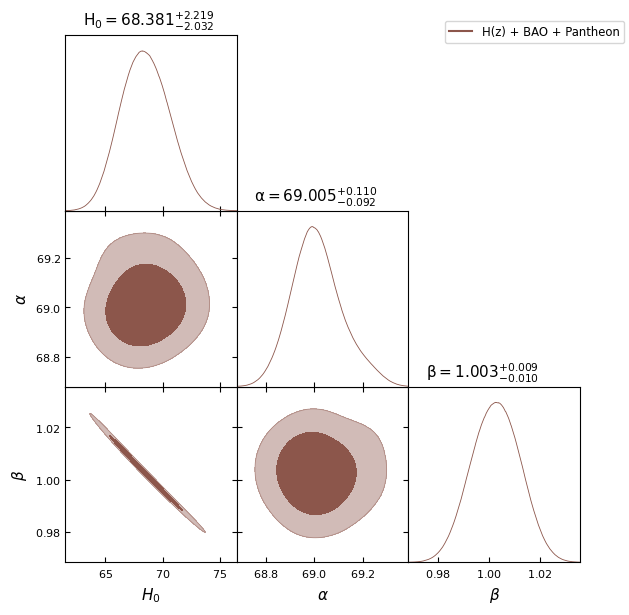

In [35]:
import getdist.plots as plots
from getdist import MCSamples
import matplotlib.pyplot as plt
from IPython.display import display, Math

colorhbp = '#8C564B' #color of the plot
names = ['Ho', 'a', 'b']
labels = ['H_0', '\\alpha', '\\beta']


# Create an instance of MCSamples
samples = MCSamples(samples=flat_samples_Hz_BAO_Pan, names=names, labels=labels)

# Create a plotter instance
g = plots.get_subplot_plotter()

# Plot the triangular plot
g.triangle_plot(samples, filled=True, colors = [colorhbp, colorhbp, colorhbp], line_args={'color': colorhbp})

# Add a blue line as legend with label "BAO"
# plt.plot([], [], label='H(z)')
plt.plot([], [], label='H(z) + BAO + Pantheon', color = colorhbp)
# Calculate the values of Ho and q
for i in range(3):
    mcmc = np.percentile(flat_samples_Hz_BAO_Pan[:, i], [16, 50, 84])
    q = np.diff(mcmc)
    txt = "$\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{+{2:.3f}}}$".format(mcmc[1], q[0], q[1], labels[i])
    
    # Add text annotation to the plot
    g.subplots[i, i].annotate(txt, xy=(0.1, 1.05), xycoords='axes fraction', fontsize=11, color='black')

# Add the legend
g.fig.legend(loc='upper right', fontsize='small', bbox_to_anchor=(1.05, 1))

plt.show()


All combined Plot

Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


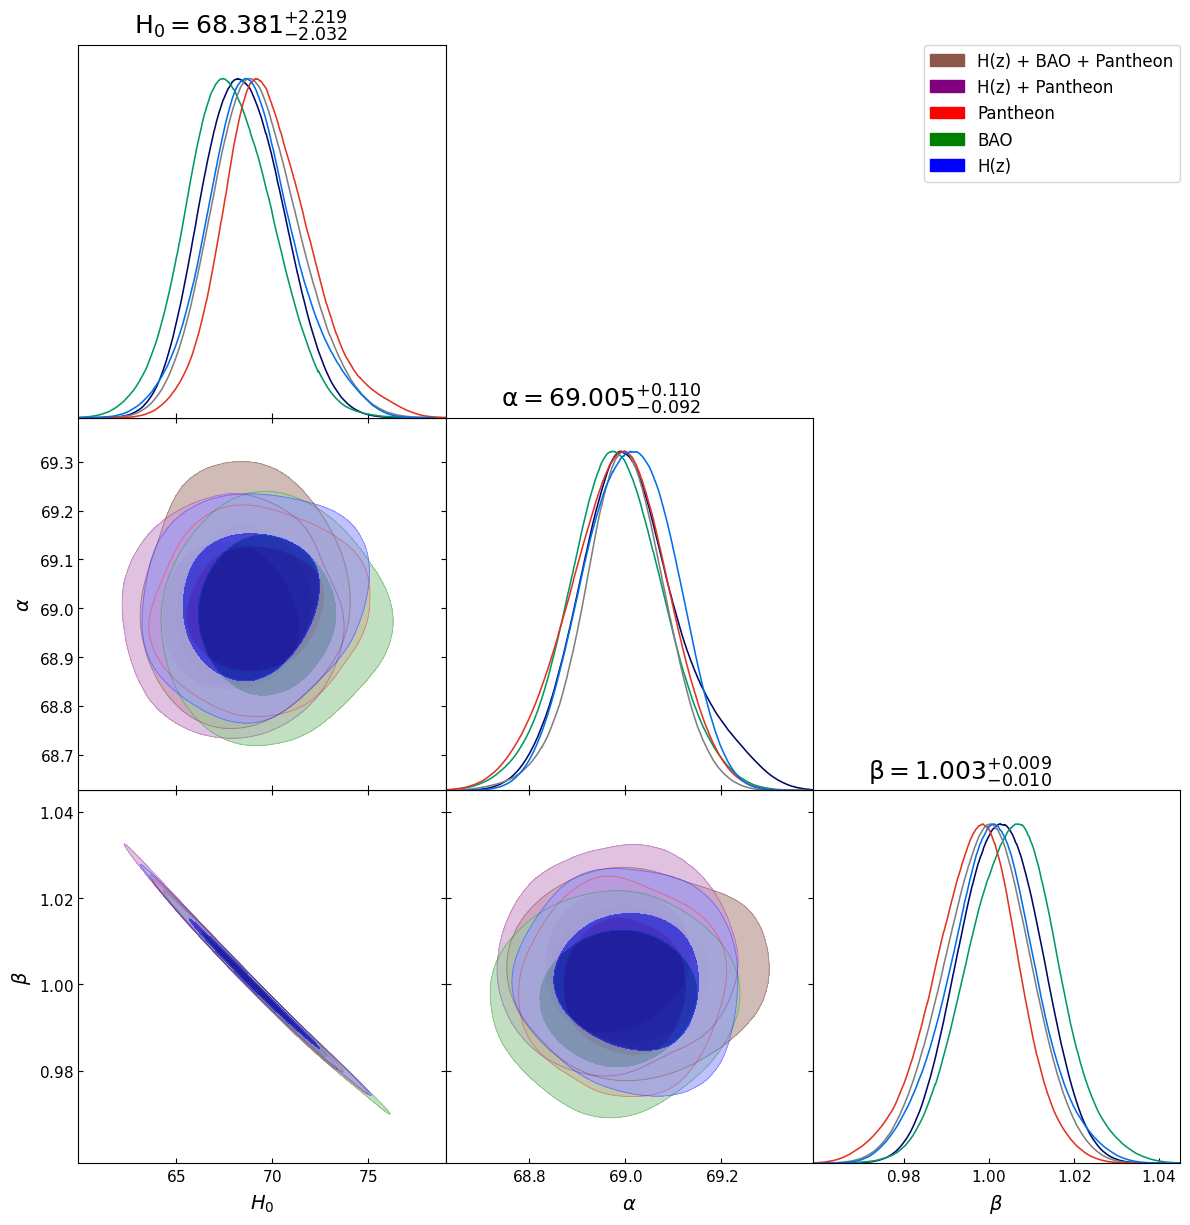

In [36]:
# Import necessary modules
import getdist.plots as plots
from getdist import MCSamples
import matplotlib.pyplot as plt
from IPython.display import display, Math


names = ['Ho', 'a', 'b']
labels = ['H_0', '\\alpha', '\\beta']


# Create an instance of MCSamples
samples_Hz = MCSamples(samples=flat_samples_with_Ho_Hz, names=names, labels=labels)
samples_BAO = MCSamples(samples=flat_samples_with_Ho_BAO, names=names, labels=labels)
samples_Pan = MCSamples(samples=flat_samples_with_Ho_Pan, names=names, labels=labels)
samples_Hz_Pan = MCSamples(samples=flat_samples_Hz_Pan, names=names, labels=labels)
samples_Hz_BAO_Pan = MCSamples(samples=flat_samples_Hz_BAO_Pan, names=names, labels=labels)

# Create a plotter instance
g = plots.get_subplot_plotter()


g = plots.get_subplot_plotter(subplot_size=4)
g.settings.alpha_filled_add=0.6
g.triangle_plot([samples_Hz_BAO_Pan,samples_Hz_Pan, samples_Pan, samples_BAO, samples_Hz], filled=True, colors = [colorhbp,colorhp,colorp,colorb,colorh], legend_labels =['H(z) + BAO + Pantheon','H(z) + Pantheon','Pantheon', 'BAO', 'H(z)'])
# g.fig.legend(loc='upper right', fontsize='small', bbox_to_anchor=(1.05, 1))
# g.add_legend(['H(z)', 'BAO', 'Pantheon'], legend_loc='upper right')
# Add a blue line as legend with label "BAO"
# plt.plot([], [], label='H(z)')
# plt.plot([], [], label='Pantheon', color = 'blue')
# Calculate the values of Ho and q
for i in range(3):
    mcmc = np.percentile(flat_samples_Hz_BAO_Pan[:, i], [16, 50, 84])
    q = np.diff(mcmc)
    txt = "$\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{+{2:.3f}}}$".format(mcmc[1], q[0], q[1], labels[i])
    
    # Add text annotation to the plot
    g.subplots[i, i].annotate(txt, xy=(0.15, 1.03), xycoords='axes fraction', fontsize= 18, color='black')

# Add the legend
# g.add_legend(['H(z)', 'BAO', 'Pantheon'], colored_text=True)
plt.show()



# Show the plot
# g.show()